In [97]:
# import numpy as np
# import math
# import matplotlib.pyplot as plt
# from matplotlib.patches import Polygon
# import matplotlib.colors as mcolors
#
# # cell = 0 - out of board
# # cell = 1 - board
# # cell > 1 - piece
# # different pieces should be 10 100 1000 .... to be able to differentiate when they are stacked
#
# class Cell:
#     def __init__(self, q, r, s):
#         if (q + r + s) != 0:
#             raise ValueError("Invalid cell: q+r+s!=0")
#         self.q = q
#         self.r = r
#         self.s = s
#
#     def __eq__(self, other):
#         return isinstance(other, Cell) and (self.q, self.r, self.s) == (other.q, other.r, other.s)
#
#     def __hash__(self):
#         return hash((self.q, self.r, self.s))
#
#     def print_cell(self):
#         print("({}, {}, {})".format(self.q, self.r, self.s))
#
# class Piece:
#     def __init__(self, piece_type):
#         self.type = piece_type
#
#     def get_allowed_moves(self, board_state):
#         raise NotImplementedError
#
# class Board:
#     #TODO Maybe it is possible to represent board using sparse matrices
#     def __init__(self, halfwidth, cell_size,  canvas_size = 20):
#         self.halfwidth = halfwidth
#         self.cell_size = cell_size
#         self.size = 2 * self.halfwidth + 1
#         self.board = np.zeros((self.size, self.size, self.size))
#         self.ax = None
#         self.canvas_size = canvas_size
#
#         for i in range(self.size):
#             for j in range(self.size):
#                 for k in range(self.size):
#                     try:
#                         self.array_to_board(i, j, k)
#                         self.board[i, j, k] = 1
#                     except:
#                         pass
#
#     def _ensure_ax(self):
#         """Internal method to create a shared Axes if it doesn't exist."""
#         if self.ax is None:
#             fig, self.ax = plt.subplots(figsize=(15,15), facecolor='white')
#             self.ax.set_xlim(0, self.canvas_size)
#             self.ax.set_ylim(0, self.canvas_size)
#             self.ax.set_aspect('equal')
#             self.ax.axis('off')
#         return self.ax
#
#     def board_to_array(self, cell):
#         if (abs(cell.q)*2+1 > self.size or
#             abs(cell.r)*2+1 > self.size or
#             abs(cell.s)*2+1 > self.size):
#             raise ValueError('Coordinates out of active board!')
#         i = self.halfwidth + cell.q
#         j = self.halfwidth + cell.r
#         k = self.halfwidth + cell.s
#         return i, j, k
#
#     def array_to_board(self, i, j ,k):
#         if i < 0 or j <0 or k < 0:
#             raise ValueError('Array indices has to be positive!')
#         if i + 1 >  self.size or j + 1 > self.size or k + 1 > self.size:
#             raise ValueError('Array indices out of active board!')
#         q = i - self.halfwidth
#         r = j - self.halfwidth
#         s = k - self.halfwidth
#         if q + r + s != 0:
#             raise ValueError('Invalid cell: q+r+s!=0')
#         cell = Cell(q, r, s)
#         return cell
#
#     def cell_corners(self, cx, cy):
#         corners = []
#         for i in range(6):
#             angle = math.radians(60 * i - 30)  # pointy-top
#             x = cx + self.size * math.cos(angle)
#             y = cy + self.size * math.sin(angle)
#             corners.append((x, y))
#         return corners
#
#     @staticmethod
#     def get_neighbours(cell):
#         neighbours = [Cell(cell.q + 1, cell.r - 1, cell.s    ),
#                       Cell(cell.q + 1, cell.r    , cell.s - 1),
#                       Cell(cell.q - 1, cell.r + 1, cell.s    ),
#                       Cell(cell.q - 1, cell.r    , cell.s + 1),
#                       Cell(cell.q    , cell.r + 1, cell.s - 1),
#                       Cell(cell.q    , cell.r - 1, cell.s + 1)]
#         return neighbours
#
#     def has_piece(self, cell):
#         i, j, k = self.board_to_array(cell)
#         if self.board[i, j, k] > 1:
#             return True
#         else:
#             return False
#
#     def get_empty_neighbours(self, cell):
#         neighbours = self.get_neighbours(cell)
#         empty_neighbours = []
#         for neighbour in neighbours:
#             if not self.has_piece(neighbour):
#                 empty_neighbours.append(neighbour)
#         return empty_neighbours
#
#     def get_occupied_neighbours(self, cell):
#         neighbours = self.get_neighbours(cell)
#         occupied_neighbours = []
#         for neighbour in neighbours:
#             if self.has_piece(neighbour):
#                 occupied_neighbours.append(neighbour)
#         return occupied_neighbours
#
#     def get_cell_value(self, cell):
#         i, j, k = self.board_to_array(cell)
#         return self.board[i, j, k]
#
#     @staticmethod
#     def compare_cells(cell1, cell2):
#         if cell1.q == cell2.q and cell1.r == cell2.r and cell1.s == cell2.s:
#             return True
#         else:
#             return False
#
#     @staticmethod
#     def cube_to_axial(q, r ,s):
#         return q, r
#
#     @staticmethod
#     def axial_to_cube(q, r):
#         s = -q-r
#         return q, r, s
#
#     @staticmethod
#     def print_cells(cells):
#         for cell in cells:
#             cell.print_cell()
#
#     def cube_to_cartesian(self, q, r ,s):
#         x = (math.sqrt(3) * self.size * self.cube_to_axial(q, r, s)[0] +
#              math.sqrt(3)/2 * self.size * self.cube_to_axial(q, r, s)[1])
#         y = 3/2 * self.size * self.cube_to_axial(q, r, s)[1]
#         return x, y
#
#     def get_occupied_cells(self):
#         occupied_cells = []
#         for i in range(self.size):
#             for j in range(self.size):
#                 for k in range(self.size):
#                     if self.board[i, j, k] > 1:
#                         occupied_cells.append(self.array_to_board(i, j, k))
#         return occupied_cells
#
#     def get_outer_border(self):
#         outer_border = []
#         occupied_cells = self.get_occupied_cells()
#         for occupied_cell in occupied_cells:
#             neighbours = self.get_neighbours(occupied_cell)
#             for neighbour in neighbours:
#                 if not self.has_piece(neighbour):
#                     not_in_outer_border = True
#                     for cell in outer_border:
#                         if self.compare_cells(cell, neighbour):
#                             not_in_outer_border = False
#                     if not_in_outer_border:
#                         outer_border.append(neighbour)
#         return outer_border
#
#     def draw_cell(self, cell, show = False, border_color='black',
#                   fill_color='white', fill_alpha=1):
#         ax = self._ensure_ax()
#         cx = self.cube_to_cartesian(cell.q, cell.r, cell.s)[0]
#         cy = self.cube_to_cartesian(cell.q, cell.r, cell.s)[1]
#         centre = self.canvas_size/2
#         rgba_fill = mcolors.to_rgba(fill_color, fill_alpha)
#         hexagon = Polygon(self.cell_corners(centre  + cx, centre + cy),
#                           closed=True, edgecolor=border_color, facecolor=rgba_fill)
#         ax.add_patch(hexagon)
#         if show:
#             plt.show()
#             return 0
#         else:
#             return ax
#
#     def draw_cells(self,cells, border_color='black', fill_color='white', fill_alpha=1):
#         for cell in cells:
#             self.draw_cell(cell,border_color = border_color, fill_color = fill_color,
#                            fill_alpha = fill_alpha)
#         return
#
#     def place_piece(self,cell, piece_value):
#         i, j, k = self.board_to_array(cell)
#         self.board[i, j, k] += piece_value
#         return
#
#     def remove_piece(self,cell, piece_value = 2):
#         i, j, k = self.board_to_array(cell)
#         self.board[i, j, k] -= piece_value
#         return
#
#     #TODO Make sure that this works with pieces that can move on top of others
#     def move_piece(self, current_cell, new_cell, piece_value):
#         if self.get_cell_value(current_cell) != piece_value + 1:
#             print("Invalid move: Cell doesn't contain piece.")
#             return False
#         if self.get_cell_value(new_cell) != 1:
#             print("Invalid move: Target cell is not empty.")
#             return False
#         i1, j1, k1 = self.board_to_array(current_cell)
#         self.board[i1, j1, k1] -= piece_value
#         i2, j2, k2 = self.board_to_array(new_cell)
#         self.board[i2, j2, k2] += piece_value
#         return True
#
#
#     def draw_board(self):
#         for i in range(self.size):
#             for j in range(self.size):
#                 for k in range(self.size):
#                     if self.board[i, j, k] != 0:
#                         cell = self.array_to_board(i, j, k)
#                         if self.board[i, j, k] == 1:
#                             self.draw_cell(cell, fill_alpha=0)
#                         if self.board[i, j, k] == 2:
#                             self.draw_cell(cell, fill_color='orange')
#                         if self.board[i, j, k] == 3:
#                             self.draw_cell(cell, fill_color='yellow')
#                         if self.board[i, j, k] == 4:
#                             self.draw_cell(cell, fill_color='blue')
#
#     def show_board(self):
#         if self.ax is None:
#             self._ensure_ax()
#         plt.show()
#
#     def get_connected_cells(self, start_cell, visited=None):
#         if visited is None:
#             visited = set()
#         visited.add(start_cell)
#         for neighbour in self.get_occupied_neighbours(start_cell):
#             if neighbour not in visited:
#                 self.get_connected_cells(neighbour, visited)
#         return visited
#
#     def is_valid_state(self):
#         occupied_cells = self.get_occupied_cells()
#         if len(occupied_cells) == len(self.get_connected_cells(occupied_cells[0])):
#             return True
#         else:
#             return False
#
# class Game(Board):
#     def __init__(self, cube, board_size = 8):
#         self.cube = cube
#         self.board_size = board_size


test
(-1, 1, 0)
(0, 0, 0)
(1, 0, -1)
hhh


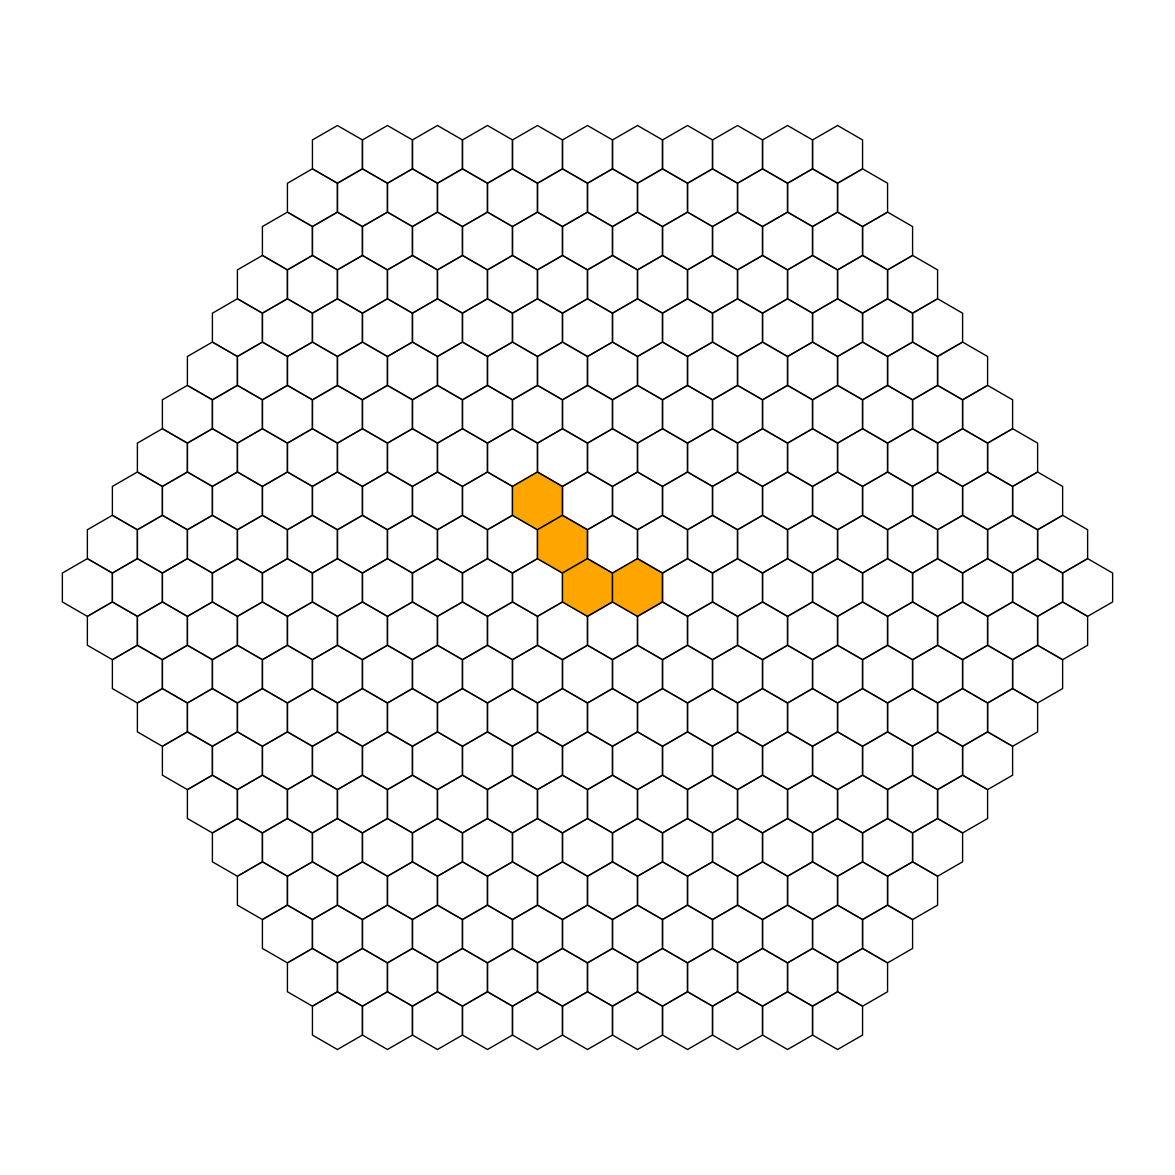

In [98]:
import importlib
import sys
sys.path.append("src")

import board
import cell
import piece
import game_engine
importlib.reload(board)
importlib.reload(cell)
importlib.reload(piece)
importlib.reload(game_engine)
from board import Board
from cell import Cell
from piece import Piece, Ant
from game_engine import Game

board_halfwidth_t = 10
cell_size_t = 1
canvas_size_t = 40

g = Game(board_halfwidth_t, cell_size=cell_size_t, canvas_size=canvas_size_t)

c1 = Cell(0,0,0)
c2 = Cell(-2,+2,0)
c3 = Cell(1,+0,-1)
c4 = Cell(-1,1,0)
ant = Ant()
#b = Board(board_halfwidth_t, 0.5, canvas_size= 3000)
#b.draw_cells(c1.get_neighbours(), fill_color='red')
#b.draw_cell(c1, fill_color='green')
g.place_piece(c1,piece_value=1)
g.place_piece(c3,piece_value=1)
g.place_piece(c2,piece_value=1)
g.place_piece(c4, piece_value=1)
#g.board.place_piece(c5,piece_value=1)
#g.board.place_piece(c4,piece_value=1)
#g.draw_board()
#g.draw_cells(g.get_outer_border(), fill_color='red')
#g.place_piece(c4,piece_value=1)
#g.draw_cells(g.get_outer_border(), fill_color='grey')
g.draw_cells(ant.get_allowed_moves(c2,g), fill_color='blue')
g.draw_board()
#g.board.draw_cells(b.get_outer_border(), fill_color='grey')
print("hhh")
#g.print_cells(g.get_occupied_neighbours(c1))
#g.board.show_board()
#g.is_valid_state()

